# QCA Lauzhack participation

### _Problem x_ : Basic Circuit

In [30]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt

circuit_format = 'mpl'

The aim of this small problem is to familiarize with quantum circuits and qiskit library and to introduce some basics of quantum mechanics. The main goal here will be to find the decomposition of several gates in the universal quantum gates CNOT, H, S and T gates, and prove through little simulations that your decomposition is the right one.

In quantum computing, we manipulate qubits. These are 2-levels quantum systems, it can be a photon polarization, a spin, trapped ions,... The fact that the system is a quantum system allow few very important properties : superpostion, interference and entanglement. A qubit can be $|\psi\rangle=\alpha|0\rangle+\beta|1\rangle$, with $|\alpha|^2+|\beta|^2=1$. According to the law of QM, $|\alpha|^2$ and $|\beta|^2$ represent the probability that we measure $|0\rangle$ or $|1\rangle$. When we have multiple qubits, they will be in a state $|\Psi\rangle = |\psi_1\rangle \otimes |\psi_2\rangle$ where $\otimes$ is the tensor product. For the notation $|\psi\rangle$ it is called the bra-ket notation and is used everywhere in QM because it is very convenient. For simplicity, just see that $|\rangle$, the ket is a column vector with the component of the state and $\langle|$, the bra, is the transpose of the ket with complex conjugate taken on the components. We suggest you go check basic algebra with bra-ket notation. 

In QM when we do a measurement, the state 'collapses' in the state it is measured. The outcome of the measurement can be represented by a projector. For example if I have a state $|\psi\rangle=\alpha|0\rangle+\beta|1\rangle$, I can measure either $|0\rangle$ or $|1\rangle$, this is represented by the set of projectors $\{|0\rangle\langle0|,|1\rangle\langle1|\}$, and the probability of each one is $P(i) = \langle\psi|P_i|\psi\rangle$, where $P_i$ is the corresponding projector.

Now, let's get to quantum computing. Basically, we apply so-called quantum-gates to qubits, the same way we apply classical gates to classical bits. There are 4 universal gates called CNOT, H, S, T, which you can go check the definition by yourself. Every other gates can be derive from them. 

Thus, what you have to do is to convert the following gates in the 4 universal gates, and show us it works using qiskit QuantumCircuit and simulation.

So first, find the decomposition of X, Y, Z, SWAP. What we suggest maybe if you don't know how to start is to look at the matrix definitions of all these gate and try to see.

X gate:


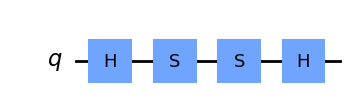

Y gate:


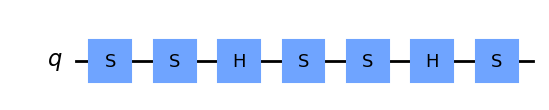

Z gate:


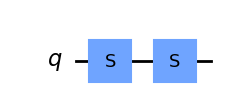

SWAP gate:


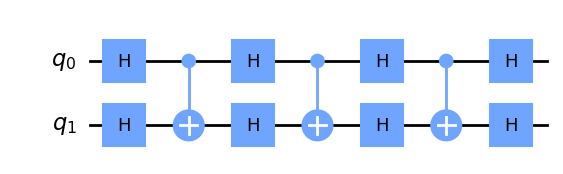

In [32]:
## your code here : 4 circuits using only universal gates to decompose X,Y,Z,SWAP
## X
X = QuantumCircuit(1)
X.h(0)
X.s(0)
X.s(0)
X.h(0)
print("X gate:")
display(X.draw(circuit_format))

## Y
Y = QuantumCircuit(1)
# Serially wired H S S gates: |a> -> HSS|a>
HSS = QuantumCircuit(1)
HSS.s(0)
HSS.s(0)
HSS.h(0)
Y.compose(HSS, [0], inplace=True)
Y.compose(HSS, [0], inplace=True)
Y.s(0)
print("Y gate:")
display(Y.draw(circuit_format))

## Z
Z = QuantumCircuit(1)
Z.s(0)
Z.s(0)
print("Z gate:")
display(Z.draw(circuit_format))

## SWAP
SWAP = QuantumCircuit(2)
# Serially wired CNOT H gates: |a,b> -> CNOT H|a,b>
CNOT_H = QuantumCircuit(2)
CNOT_H.h([0, 1])
CNOT_H.cx(0, 1)
SWAP.compose(CNOT_H, [0, 1], inplace=True)
SWAP.compose(CNOT_H, [0, 1], inplace=True)
SWAP.compose(CNOT_H, [0, 1], inplace=True)
SWAP.h([0, 1])
print("SWAP gate:")
display(SWAP.draw(circuit_format))


Now, use these circuits to compare the result you get with the gates given by qiskit. Use qiskit class Statevector, with its method evolve(). Always start with the zero state, this is what is done in qiskit.

In [2]:
## your code here : compare your circuit outcomes with the ones of qiskit
